In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
df = pd.read_csv('gapminder.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


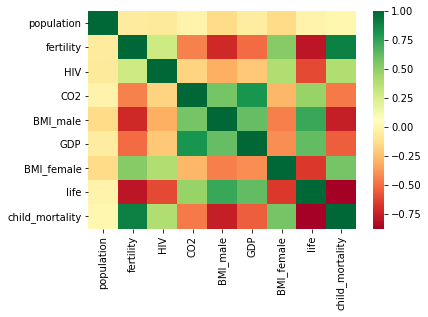

In [38]:
sns.heatmap(df.corr(), cmap="RdYlGn")

0.6192442167740035


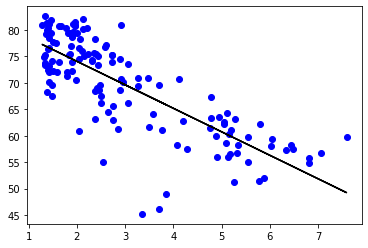

In [9]:
x = df["fertility"]
y = df["life"]

regression = LinearRegression()
# Can't just use x for the fertility as it is 1D, need to convert it to 2D
regression.fit(x[:, None], y)
print(regression.score(x[:, None],y))

fig, ax = plt.plot(x, y, 'bo', x, regression.predict(x[:, None]), '-k')

In [10]:
x2 = df[["fertility","HIV","CO2","BMI_male","GDP","BMI_female","child_mortality"]]
y2 = df["life"]

regression2 = LinearRegression()
regression2.fit(x2,y2)
regression2.score(x2,y2)

0.8974995317332959

This linear regression model score is significantly higher than the previous model score which only used the fertility to predict life expectancy. 

In [12]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(regression, x[:, None], y))
print(cross_val_score(regression2, x2, y2))

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
[0.81621881 0.8322471  0.90868335 0.81325568 0.94404223]


As can be seen from comparing the two cross-validation lists, the regression with multiple features provides a consistantly higher score and therefore the multiple feature model is considered to be more accurate to predict life expectancy.

In [19]:
df2 = pd.read_csv("creditcard.csv")
print(df2.shape)
df2.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


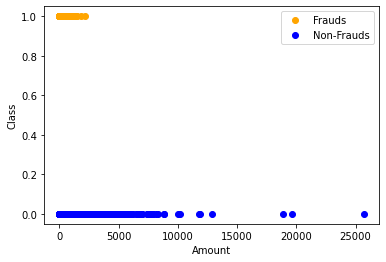

In [27]:
frauds = df2.loc[df2['Class'] == 1]
non_frauds = df2.loc[df2['Class'] == 0]

plt.plot(frauds.Amount, frauds.Class, 'o', color='orange', label='Frauds')
plt.plot(non_frauds.Amount, non_frauds.Class, 'o', color='blue', label='Non-Frauds')
plt.xlabel('Amount')
plt.ylabel('Class')
plt.legend()
plt.show()

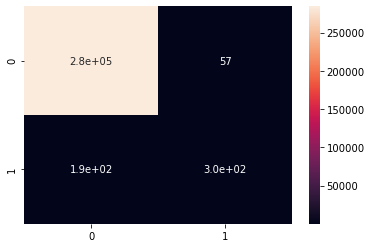

In [35]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
x3 = df2.drop("Class", axis=1)
y3 = df2.Class

logistic_regression = LogisticRegression(max_iter = 2000)
logistic_regression.fit(x3,y3)
y3_predict = logistic_regression.predict(x3)
conf_matrix = confusion_matrix(y3, y3_predict)
sns.heatmap(conf_matrix, annot=True)